In [1]:
import sys
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, LogLocator, NullFormatter
from glob import glob
from sklearn.utils import resample

In [2]:
import pymbar
sys.path.append("/home/panxl/scripts/")
from mbar_pmf import mbar_pmf

In [3]:
pwd

'/ourdisk/hpc/ccats/dont_archive/van/claisen_rearrangement/pm3/mbar'

In [4]:
# from glob import glob
n_windows = 21
val_kn = []
for i in range(n_windows):
    fnames = sorted(glob('../%02d/step6.0?_equilibration.cv' % i))
    # fnames = sorted(glob('../%02d/all_step6.cv' % i))
    arrays = [np.loadtxt(f, usecols=1)[::] for f in fnames[:]]
    val_kn.append(np.concatenate(arrays))
val0_k = np.linspace(-2.00, 2.00, n_windows)
K_k = np.ones(n_windows) * 300.0
val_min = -2.00
val_max = 2.00
nbins = n_windows - 1

In [5]:
for i in range(n_windows):
    print("Window %02d:" % i, pymbar.timeseries.subsampleCorrelatedData(val_kn[i], conservative=True))

Window 00: range(0, 1000)
Window 01: range(0, 1000)
Window 02: range(0, 1000)
Window 03: range(0, 1000)
Window 04: range(0, 1000)
Window 05: range(0, 1000)
Window 06: range(0, 1000)
Window 07: range(0, 1000)
Window 08: range(0, 1000)
Window 09: range(0, 1000)
Window 10: range(0, 1000)
Window 11: range(0, 1000)
Window 12: range(0, 1000)
Window 13: range(0, 1000)
Window 14: range(0, 1000)
Window 15: range(0, 1000)
Window 16: range(0, 1000)
Window 17: range(0, 1000)
Window 18: range(0, 1000)
Window 19: range(0, 1000)
Window 20: range(0, 1000)


In [6]:
# mbar = mbar_pmf(val_kn, val0_k, K_k, 300.0, u_kn=np.array(ene_pm3))
mbar = mbar_pmf(val_kn, val0_k, K_k, 300.0)

K (total states) = 21, total samples = 21000
N_k = 
[1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000
 1000 1000 1000 1000 1000 1000 1000]
There are 21 states with samples.
Initial dimensionless free energies with method BAR
f_k = 
[ 0.          1.23072943  1.90991958  3.98925049  6.56050668 11.49828531
 18.18114861 27.78548643 40.68764472 56.33533948 76.12567358 96.53454367
 95.43924429 82.33588689 70.84715207 61.48702356 53.86286496 48.08497101
 43.73961074 41.62979001 40.22636601]
Determining dimensionless free energies by Newton-Raphson / self-consistent iteration.
self consistent iteration gradient norm is 3.5123e-08, Newton-Raphson gradient norm is  1.843e-22
Choosing self-consistent iteration on iteration 0
self consistent iteration gradient norm is 2.9329e-08, Newton-Raphson gradient norm is  4.954e-22
Choosing self-consistent iteration for lower gradient on iteration 1
self consistent iteration gradient norm is 2.4564e-08, Newton-Raphson gradient norm is 2

In [7]:
# bin_centers, f_i, df_i, reweighting_entropy = mbar.get_pmf(val_min, val_max, nbins, u_kn=np.array(ene_pm3))
bin_centers, f_i, df_i, reweighting_entropy = mbar.get_pmf(val_min, val_max, nbins)
bin_centers, f_i, df_i, reweighting_entropy = mbar.get_pmf(val_min, val_max, nbins, uncertainties='from-specified', pmf_reference=f_i[:20].argmin())
np.savetxt("freefile_mbar0", np.column_stack((bin_centers, f_i, df_i)))

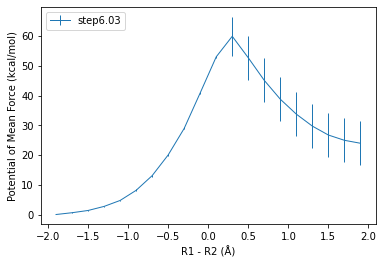

59.98441608404634 6.547568955948204


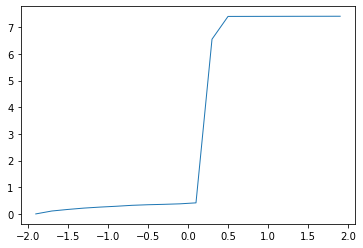

In [8]:
# initial0 = np.loadtxt("freefile_mbar0")
# initial1 = np.loadtxt("freefile_mbar1")
# initial2 = np.loadtxt("freefile_mbar2")
# initial3 = np.loadtxt("freefile_mbar3")
plt.xlabel("R1 - R2 (Å)")
plt.ylabel("Potential of Mean Force (kcal/mol)")

# plt.errorbar(initial0[:,0], initial0[:,1] - initial0[:10,1].min(), yerr=initial0[:,2], linewidth=1, label="0.0 - 43.2 ps")
# plt.errorbar(initial1[:,0], initial1[:,1] - initial1[:10,1].min(), yerr=initial1[:,2], linewidth=1, label="10.0 - 43.2 ps")
# plt.errorbar(initial2[:,0], initial2[:,1] - initial2[:10,1].min(), yerr=initial2[:,2], linewidth=1, label="20.0 - 43.2 ps")
# plt.errorbar(initial3[:,0], initial3[:,1] - initial3[:10,1].min(), yerr=initial3[:,2], linewidth=1, label="30.0- 43.2 ps")
plt.errorbar(bin_centers, f_i - f_i[:10].min(), yerr=df_i, linewidth=1, label="step6.00")
plt.legend(loc=2)
plt.savefig("claisen_pmf.png", dpi=300)
plt.show()
plt.errorbar(bin_centers, df_i, linewidth=1)
# print(round(initial0[:,1].max() - initial0[:10,1].min(),1), round(initial0[initial0[:,1].argmax()][2],1))
# print(round(initial1[:,1].max() - initial1[:10,1].min(),1), round(initial1[initial1[:,1].argmax()][2],1))
# print(round(initial2[:,1].max() - initial2[:10,1].min(),1), round(initial2[initial2[:,1].argmax()][2],1))
# print(round(initial3[:,1].max() - initial3[:10,1].min(),1), round(initial3[initial3[:,1].argmax()][2],1))
print(f_i.max() - f_i[:10].min(), df_i[f_i.argmax()])

Barrier Height (kcal/mol): 22.19
Mean Uncertainty (kcal/mol): 0.21
Max Uncertainty (kcal/mol): 0.32
Reweighting Entropy:
 [0.98755275 0.98322762 0.97817868 0.97397873 0.97047247 0.97193627
 0.9674841  0.9565545  0.94920405 0.9526953  0.94769592 0.94194889
 0.93486726 0.92338965 0.91284535 0.94230776 0.9410212  0.94476692
 0.92496902 0.95116651 0.98433633 0.9859862  0.98409687 0.97703861
 0.97673058 0.963039   0.95728095 0.93712396 0.9255638  0.93947758
 0.96039662 0.98056637 0.97649532 0.97841222 0.97387657 0.97532941
 0.97549961 0.9825743  0.98383075 0.98576527 0.98898408]


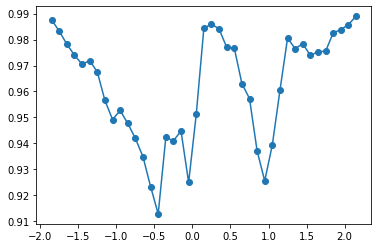

In [31]:
print("Barrier Height (kcal/mol): %.2f" % (f_i.max() - f_i.min()))
print("Mean Uncertainty (kcal/mol): %.2f" % df_i.mean())
print("Max Uncertainty (kcal/mol): %.2f" % df_i.max())
print("Reweighting Entropy:\n", reweighting_entropy)
plt.plot(bin_centers, reweighting_entropy, '-o')

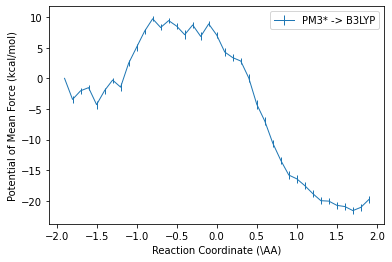

In [33]:
bin_centers, f_i_rw, df_i_rw, reweighting_entropy = mbar.get_pmf(val_min, val_max, nbins, u_kn=np.array(ene_b3lyp), uncertainties='from-specified', pmf_reference=f_i[:10].argmin())
np.savetxt("freefile_mbar_wtp", np.column_stack((bin_centers, f_i_rw, df_i_rw)), fmt="%.2f %f %f")
np.savetxt("reweighting_entropy", np.column_stack((bin_centers, reweighting_entropy)), fmt="%.2f %f")
plt.xlabel("Reaction Coordinate (\AA)")
plt.ylabel("Potential of Mean Force (kcal/mol)")
# plt.errorbar(free_dft[:,0], free_dft[:,1], yerr=free_dft[:,2], linewidth=1, label="direct B3LYP")
plt.errorbar(bin_centers, f_i_rw - f_i_rw[0], yerr=df_i_rw, linewidth=1, label="PM3* -> B3LYP")
plt.legend()

In [17]:
likelihood_all = []
for i in range(100):
    alpha = (i + 1) * 0.01
    y_pred, sigma, likelihood = mbar.get_reweighted_tp(bin_centers, f_i_rw, reweighting_entropy, alpha)
    likelihood_all.append(likelihood)
print(np.array(likelihood_all).max(), np.array(likelihood_all).argmax())

/home/panxl/.local/opt/miniforge3/lib/python3.8/site-packages/sklearn/gaussian_process/_gpr.py:509: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


-79.26687861459216 56


Barrier Height (kcal/mol): 14.40


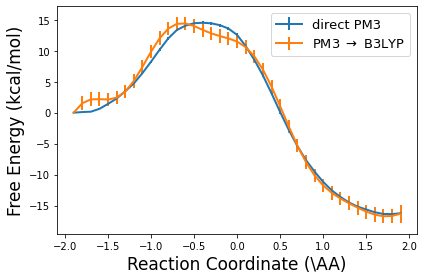

In [19]:
y_pred, sigma, likelihood = mbar.get_reweighted_tp(bin_centers, f_i_rw, reweighting_entropy, 0.57)
sigma2 = sigma + sigma[y_pred[:10].argmin()]
sigma2[y_pred[:10].argmin()] = 0.0
plt.xlabel("Reaction Coordinate (\AA)", fontsize=17)
plt.ylabel("Free Energy (kcal/mol)", fontsize=17)
# plt.errorbar(free_dft[:,0], free_dft[:,1] - free_dft[:10,1].min(), yerr=free_dft[:,2], linewidth=2.0, label="direct B3LYP")
plt.errorbar(bin_centers, f_i - f_i[:10].min(), yerr=df_i, linewidth=2.0, label="direct PM3")
#plt.errorbar(bin_centers, f_i_rw - y_pred[:10].min(), yerr=df_i_rw, linewidth=2.0, label=r"PM3 $\rightarrow$ B3LYP")
plt.errorbar(bin_centers, y_pred - y_pred[:10].min(), yerr=sigma2, linewidth=2.0, label=r"PM3 $\rightarrow$ B3LYP")
plt.legend(fontsize=13, loc=1)
#plt.ylim(-1, 26)
# print("Barrier Height DFT (kcal/mol): %.2f" % (free_dft[:,1].max() - free_dft[:10,1].min()))
print("Barrier Height (kcal/mol): %.2f" % (y_pred.max() - y_pred[:10].min()))
np.savetxt("freefile_mbar_wtp_gpr", np.column_stack((bin_centers, y_pred, sigma2)), fmt="%.2f %f %f")
plt.tight_layout()
# plt.savefig("sn2_pm3_pmf3.pdf")

Barrier Height (kcal/mol): 15.18
Mean Uncertainty (kcal/mol): 0.73
Reweighting Entropy:
 [0.0042022  0.17591349 0.26959607 0.33809916 0.13919166 0.1749552
 0.44556783 0.06160092 0.32306555 0.14709513 0.2719634  0.33749502
 0.26249785 0.31425769 0.33395539 0.03141004 0.41425532 0.07729795
 0.57703088 0.29377772 0.07788508 0.43623673 0.38462343 0.36412742
 0.04208171 0.30866914 0.35420374 0.13924581 0.42640337 0.14708235
 0.20265976 0.30483329 0.29931782 0.42626948 0.4114261  0.36705387
 0.46260791 0.2578781  0.45447042]


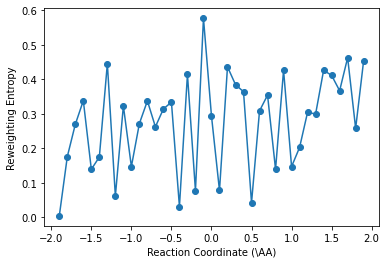

In [14]:
plt.xlabel("Reaction Coordinate (\AA)")
plt.ylabel("Reweighting Entropy")
plt.plot(bin_centers, reweighting_entropy, '-o')
print("Barrier Height (kcal/mol): %.2f" % (f_i_rw.max() - f_i_rw[:10].min()))
print("Mean Uncertainty (kcal/mol): %.2f" % df_i_rw.mean())
print("Reweighting Entropy:\n", reweighting_entropy)

In [66]:
n_images = 40
n_dims = 2
images_cm = np.zeros((n_images, n_dims*2))
images2_cm = np.zeros((n_images, n_dims*2))
images3_cm = np.zeros((n_images, n_dims*2))
images4_cm = np.zeros((n_images, n_dims*2))

window = 40

for i in range(n_images):
    fnames = sorted(glob('../%02d/step6.00_equilibration_qt.cv' % i))
    d1 = np.concatenate([np.loadtxt(f, usecols=1)[2001::] for f in fnames[:]])
    d2 = np.concatenate([np.loadtxt(f, usecols=2)[2001::] for f in fnames[:]])
    images_cm[i, 0] = ((d2 + d1)/2).mean()
    images_cm[i, 1] = ((d2 - d1)/2).mean()
    images_cm[i, 2] = ((d2 + d1)/2).std()
    images_cm[i, 3] = ((d2 - d1)/2).std()
for i in range(n_images):
    fnames = sorted(glob('/work/panxl/qmmm_mts/chorismate_mutase/pbc2/b3lyp2/%02d/step6.??_equilibration.cv' % i))
    d1 = np.concatenate([np.loadtxt(f, usecols=1) for f in fnames[4:]])
    d2 = np.concatenate([np.loadtxt(f, usecols=2) for f in fnames[4:]])
    images2_cm[i, 0] = ((d2 + d1)/2).mean()
    images2_cm[i, 1] = ((d2 - d1)/2).mean()
    images2_cm[i, 2] = ((d2 + d1)/2).std()
    images2_cm[i, 3] = ((d2 - d1)/2).std()
for i in range(n_images):
    fnames = sorted(glob('../%02d/step6.00_equilibration.cv' % i))
    d1 = np.concatenate([np.loadtxt(f, usecols=1) for f in fnames[:]])[2001:]
    d2 = np.concatenate([np.loadtxt(f, usecols=2) for f in fnames[:]])[2001:]
    images3_cm[i, 0] = ((d2 + d1)/2).mean()
    images3_cm[i, 1] = ((d2 - d1)/2).mean()
    images3_cm[i, 2] = ((d2 + d1)/2).std()
    images3_cm[i, 3] = ((d2 - d1)/2).std()
# for i in range(n_images):
#     fnames = sorted(glob('../../b3lyp_mts12_langevin_mid/%02d/step6.00_equilibration.cv' % i))
#     d1 = np.concatenate([np.loadtxt(f, usecols=1) for f in fnames[:]])[:]
#     d2 = np.concatenate([np.loadtxt(f, usecols=2) for f in fnames[:]])[:]
#     images4_cm[i, 0] = ((d2 + d1)/2).mean()
#     images4_cm[i, 1] = ((d2 - d1)/2).mean()
#     images4_cm[i, 2] = ((d2 + d1)/2).std()
#     images4_cm[i, 3] = ((d2 - d1)/2).std()

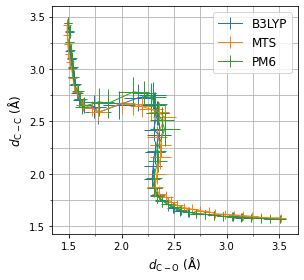

In [67]:
fig, ax = plt.subplots()

ax.set_aspect('equal', 'box')
ax.errorbar(images_cm[:, 0], images_cm[:, 1], xerr=images_cm[:, 2], yerr=images_cm[:, 3], fmt='-', linewidth=1, label="B3LYP")
ax.errorbar(images2_cm[:, 0], images2_cm[:, 1], xerr=images2_cm[:, 2], yerr=images2_cm[:, 3], fmt='-', linewidth=1, label="MTS")
ax.errorbar(images3_cm[:, 0], images3_cm[:, 1], xerr=images3_cm[:, 2], yerr=images3_cm[:, 3], fmt='-', linewidth=1, label="PM6")
# ax.errorbar(images4_cm[window:, 0], images4_cm[window:, 1], xerr=images4_cm[window:, 2], yerr=images4_cm[window:, 3], fmt='-', linewidth=1, label="PM6-1")
# ax.plot(images_cm[:, 0], images_cm[:, 1], '.-', linewidth=1, label="NEW")
# ax.plot(images2_cm[:, 0], images2_cm[:, 1], '.-', linewidth=1, label="OLD")
# ax.plot(images3_cm[:, 0], images3_cm[:, 1], '.-', linewidth=1, label="MTS 8fs/1fs End")
# ax.plot(images4_cm[:, 0], images4_cm[:, 1], '.-', linewidth=1, label="MTS 8fs/1fs Mid")

ax.set_xlabel("$d_\mathrm{C-O}$ (Å)", fontsize=12)
ax.set_ylabel("$d_\mathrm{C-C}$ (Å)", fontsize=12)
ax.set_xticks(np.linspace(1.5, 3.5, 5))
ax.set_yticks(np.linspace(1.5, 3.5, 5))
ax.xaxis.set_minor_locator(AutoMinorLocator(2))
ax.yaxis.set_minor_locator(AutoMinorLocator(2))
ax.legend(fontsize=12)
ax.set_aspect('equal', 'box')
ax.grid(b=None, which='both', axis='both')

# ax.plot(images2_cm[13, 0], images2_cm[13, 1], 'r*', linewidth=1, label="MTS")
# ax.plot(images2_cm[17, 0], images2_cm[17, 1], 'k*', linewidth=1, label="MTS")

fig.subplots_adjust(hspace=0.2)
fig.tight_layout()
# fig.savefig("pathway.pdf")

In [68]:
a = !grep EPtot ../00/step6.00_equilibration.mdout | head -501 | tail -500
epot = np.loadtxt(a, usecols=8)
a = !grep EPtot ../00/step6.00_equilibration_qt.mdout | head -501 | tail -500
epot1 = np.loadtxt(a, usecols=8)

(array([ 1.,  0.,  0.,  0.,  1.,  2.,  1.,  2.,  7.,  6.,  9.,  6., 14.,
        13., 18., 20., 21., 23., 23., 26., 24., 18., 29., 32., 21., 17.,
        22., 27., 17., 20., 23., 10., 11., 11.,  7.,  4.,  3.,  2.,  5.,
         4.]),
 array([-136648.0706   , -136624.0909225, -136600.111245 , -136576.1315675,
        -136552.15189  , -136528.1722125, -136504.192535 , -136480.2128575,
        -136456.23318  , -136432.2535025, -136408.273825 , -136384.2941475,
        -136360.31447  , -136336.3347925, -136312.355115 , -136288.3754375,
        -136264.39576  , -136240.4160825, -136216.436405 , -136192.4567275,
        -136168.47705  , -136144.4973725, -136120.517695 , -136096.5380175,
        -136072.55834  , -136048.5786625, -136024.598985 , -136000.6193075,
        -135976.63963  , -135952.6599525, -135928.680275 , -135904.7005975,
        -135880.72092  , -135856.7412425, -135832.761565 , -135808.7818875,
        -135784.80221  , -135760.8225325, -135736.842855 , -135712.8631775,
      

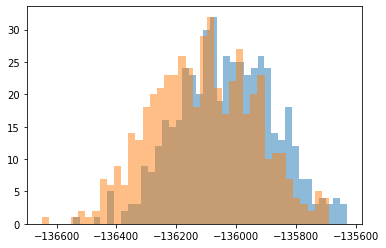

In [69]:
plt.hist(epot, bins=40, density=False, alpha=0.5)
plt.hist(epot1, bins=40, density=False, alpha=0.5)
# plt.hist(epot2, bins=40, density=False, alpha=0.5)
# plt.hist(np.concatenate((epot, epot1)), bins=40, range=[-7000, -6600], density=False, alpha=0.5)
# plt.hist(epot3, bins=40, range=[-6800, -6400], density=False, alpha=0.5)

In [6]:
a = !grep ESCF ../36/step6.00_equilibration.mdout | head -501 | tail -500
epot = np.loadtxt(a, usecols=1)
a = !grep ESCF ../36/step6.00_equilibration_qt.mdout | head -501 | tail -500
epot1 = np.loadtxt(a, usecols=1) / 0.9375
# a = !grep PM3ESCF ../00/step6.00_equilibration_320.mdout | head -501 | tail -500
# epot2 = np.loadtxt(a, usecols=1)
# a = !grep PM3ESCF ../00/step6.00_equilibration_330.mdout | head -501 | tail -500
# epot3 = np.loadtxt(a, usecols=1)

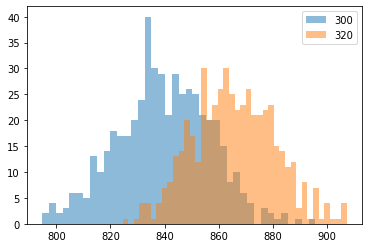

In [9]:
plt.hist(epot, bins=40, density=False, alpha=0.5, label="300")
plt.hist(epot1, bins=40, density=False, alpha=0.5, label="320")
# plt.hist(epot2, bins=40, density=False, alpha=0.5, label="320")
# plt.hist(epot3, bins=40, density=False, alpha=0.5, label="330")
# plt.hist(np.concatenate((epot[:len(epot1)], epot1)), bins=40, density=False, alpha=0.5)
# plt.hist(epot3, bins=40, range=[-6800, -6400], density=False, alpha=0.5)
plt.legend()

In [58]:
kcat=2.3e-3 / 60
kb=1.3806452e-23 / 1000 / 4.184
h=6.6260701e-34 / 1000 / 4.184
T=298
R=8.314 / 1000 / 4.184

In [59]:
np.log((kcat*h)/(kb*T))*R*T

-23.464844749835493